# Working with Data APIs

**Adapted from: Sam Maurer // maurer@berkeley.edu // Oct. 3, 2016**

This notebook provides a demonstration of data-access APIs that operate over the web. See README.md for setup instructions.

In Part 1, we'll load and parse results from an API feed of earthquake data.  
In Part 2, we'll add query parameters to the workflow, using the Google Maps Geolocation API as an example.  
In Part 3, we'll use an authenticated API to query public Twitter posts. 

# Part 1: Reading from an automated data feed

### USGS real-time earthquake feeds

This is an API for near-real-time data about earthquakes. Data is provided in JSON format over the web. No authentication is needed, and there's no way to customize the output. Instead, the API has a separate endpoint for each permutation of the data that users might want.

**API documentation:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php

**Sample API endpoint, for magnitude 4.5+ earthquakes in past day:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_day.geojson  


In [1]:
%matplotlib inline

import pandas as pd

import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [3]:
# download data on magnitude 2.5+ quakes from the past week

endpoint_url = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson"
response = requests.get(endpoint_url)
results = response.text

# what is the data type of the results?
print(type(results))

<class 'str'>


In [4]:
# print the first 500 characters to see a sample of the data

print(results[:500])

{"type":"FeatureCollection","metadata":{"generated":1615417927000,"url":"https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson","title":"USGS Magnitude 2.5+ Earthquakes, Past Week","status":200,"api":"1.10.3","count":474},"features":[{"type":"Feature","properties":{"mag":2.47,"place":"Island of Hawaii, Hawaii","time":1615416193700,"updated":1615416523370,"tz":null,"url":"https://earthquake.usgs.gov/earthquakes/eventpage/hv72379437","detail":"https://earthquake.usgs.gov/earth


In [6]:
# it looks like the results are a string with JSON-formatted data inside

# parse the string into a Python dictionary
data = json.loads(results)

print(type(data))

<class 'dict'>


In [7]:
# print the most recent quake

quakes = data['features']
print(quakes[0])

{'type': 'Feature', 'properties': {'mag': 2.47, 'place': 'Island of Hawaii, Hawaii', 'time': 1615416193700, 'updated': 1615416523370, 'tz': None, 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/hv72379437', 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/hv72379437.geojson', 'felt': None, 'cdi': None, 'mmi': None, 'alert': None, 'status': 'automatic', 'tsunami': 0, 'sig': 94, 'net': 'hv', 'code': '72379437', 'ids': ',hv72379437,', 'sources': ',hv,', 'types': ',origin,phase-data,', 'nst': 11, 'dmin': None, 'rms': 0.119999997, 'gap': 223, 'magType': 'ml', 'type': 'earthquake', 'title': 'M 2.5 - Island of Hawaii, Hawaii'}, 'geometry': {'type': 'Point', 'coordinates': [-155.461837768555, 19.1726665496826, 32.2400016784668]}, 'id': 'hv72379437'}


In [8]:
# print it more clearly

pp.pprint(quakes[0]['geometry'])
pp.pprint(quakes[0]['properties'])

{'coordinates': [-155.461837768555, 19.1726665496826, 32.2400016784668],
 'type': 'Point'}
{'alert': None,
 'cdi': None,
 'code': '72379437',
 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/hv72379437.geojson',
 'dmin': None,
 'felt': None,
 'gap': 223,
 'ids': ',hv72379437,',
 'mag': 2.47,
 'magType': 'ml',
 'mmi': None,
 'net': 'hv',
 'nst': 11,
 'place': 'Island of Hawaii, Hawaii',
 'rms': 0.119999997,
 'sig': 94,
 'sources': ',hv,',
 'status': 'automatic',
 'time': 1615416193700,
 'title': 'M 2.5 - Island of Hawaii, Hawaii',
 'tsunami': 0,
 'type': 'earthquake',
 'types': ',origin,phase-data,',
 'tz': None,
 'updated': 1615416523370,
 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/hv72379437'}


In [9]:
# pull out the title from each earthquake listing

for q in quakes:
    print(q['properties']['title'])

M 2.5 - Island of Hawaii, Hawaii
M 4.8 - Kermadec Islands region
M 5.0 - 286 km WNW of Haveluloto, Tonga
M 2.9 - 27km W of Petrolia, CA
M 4.7 - 41 km W of Gonābād, Iran
M 5.8 - 280 km WNW of Haveluloto, Tonga
M 5.1 - south of the Kermadec Islands
M 4.6 - south of the Fiji Islands
M 4.2 - 49 km S of Ordos, China
M 2.7 - 5 km SW of Dibble, Oklahoma
M 5.1 - 84 km ESE of Kokopo, Papua New Guinea
M 4.5 - 227 km ENE of Gisborne, New Zealand
M 4.3 - 135 km E of Yamada, Japan
M 4.1 - 15 km SW of Salvaleón de Higüey, Dominican Republic
M 2.7 - 54 km S of Whites City, New Mexico
M 4.5 - east of the North Island of New Zealand
M 4.5 - 49 km SW of Tomohon, Indonesia
M 4.2 - 3 km NNE of Yanaoca, Peru
M 4.1 - 76 km NNE of Colchani, Bolivia
M 2.7 - 3 km SSE of Pāhala, Hawaii
M 2.6 - 19 km E of Alamo, Nevada
M 4.4 - 2 km W of Reykjavík, Iceland
M 4.9 - 53 km W of Pandan Niog, Philippines
M 2.8 - 23km S of South Dos Palos, CA
M 4.3 - Izu Islands, Japan region
M 3.0 - 6 km SSE of Pole Ojea, Puerto Rico


In [10]:
# pull out magnitudes and depths into a Pandas dataframe, using
# a more compact Python syntax for iterating through lists

d = {'magnitude': [q['properties']['mag'] for q in quakes],
     'depth': [q['geometry']['coordinates'][2] for q in quakes]}

df = pd.DataFrame.from_dict(d)

# how many earthquakes were loaded into the dataframe?
print(len(df))

474


In [11]:
# print the first few lines of data

print(df.head())

   magnitude       depth
0       2.47   32.240002
1       4.80    6.950000
2       5.00  552.590000
3       2.85   16.950000
4       4.70   10.000000


In [12]:
# print some descriptive statistics

print(df.describe())

        magnitude       depth
count  474.000000  474.000000
mean     4.423692   37.023107
std      1.051540   84.885820
min      2.460000   -3.350000
25%      3.625000   10.000000
50%      4.700000   10.000000
75%      5.100000   17.865000
max      8.100000  600.770000


<AxesSubplot:xlabel='magnitude', ylabel='depth'>

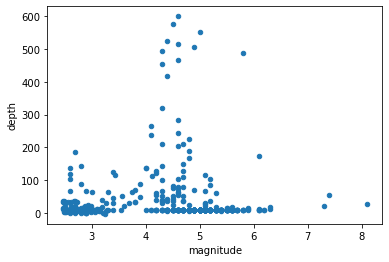

In [13]:
# plot the depth vs. magnitude

df.plot(x='magnitude', y='depth', kind='scatter')

In [14]:
# save the dataframe to disk

df.to_csv('usgs_earthquake_data.csv')

print('file saved')

file saved


In [15]:
# read it back later

new_df = pd.read_csv('usgs_earthquake_data.csv')

print(new_df.head())

   Unnamed: 0  magnitude       depth
0           0       2.47   32.240002
1           1       4.80    6.950000
2           2       5.00  552.590000
3           3       2.85   16.950000
4           4       4.70   10.000000


# Part 2: Querying an API endpoint

### Google Maps Geocoding API

Google has lots of APIs that let you access its services through code instead of through GUI apps. This one from Google Maps lets you look up the latitude-longitude coordinates of street addresses.

It works similarly to the earthquakes example, but with query parameters added to the URL endpoint!

**API documentation:**  
https://developers.google.com/maps/documentation/geocoding/intro

**API endpoint:**  
https://maps.googleapis.com/maps/api/geocode/json

**API endpoint with query parameters:**  
https://maps.googleapis.com/maps/api/geocode/json?address=Wurster+Hall

In [17]:
import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [18]:
# we have to encode the search query so that it can be passed as a URL, 
# with spaces and other special characters removed

endpoint = 'https://maps.googleapis.com/maps/api/geocode/json'

params = {'address': 'young library uky'}

url = requests.Request('GET', endpoint, params=params).prepare().url
print(url)

https://maps.googleapis.com/maps/api/geocode/json?address=young+library+uky


In [19]:
# download and parse the results

response = requests.get(url)
results = response.text
data = json.loads(results)

print(data)

{'error_message': 'You must use an API key to authenticate each request to Google Maps Platform APIs. For additional information, please refer to http://g.co/dev/maps-no-account', 'results': [], 'status': 'REQUEST_DENIED'}


In [23]:
# print it more nicely

pp.pprint(data)

{'error_message': 'You must use an API key to authenticate each request to '
                  'Google Maps Platform APIs. For additional information, '
                  'please refer to http://g.co/dev/maps-no-account',
 'results': [],
 'status': 'REQUEST_DENIED'}


In [56]:
# pull out the lat-lon coordinates

for r in data['results']:
    coords = r['geometry']['location']
    print(coords['lat'], coords['lng'])

### Exercises

1. Search for some other addresses or landmarks!
2. Take a look at the [API documentation](https://developers.google.com/maps/documentation/geocoding/intro). What are the usage limits?

# Part 3: Querying an API with authentication

### Twitter REST APIs

Twitter's APIs also operate over the web, but they require a back-and-forth authentication process at the beginning of each connection. It's easier to have a Python library handle this than to create the query URLs ourselves.

The Twitter "REST" APIs perform stand-alone operations: you submit a query and receive results, like in earlier examples. ([REST](https://en.wikipedia.org/wiki/Representational_state_transfer) is a particular set of guidelines that many APIs follow.) Twitter also has a "streaming" API that continues sending results in real time until you disconnect.

**API documentation:**  
https://dev.twitter.com/rest/public  
https://dev.twitter.com/overview/api/tweets

**Documentation for the Python helper library**:  
https://github.com/geduldig/TwitterAPI

In [25]:
from TwitterAPI import TwitterAPI

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [26]:
# import API credentials from keys.py file in the
# same directory as this notebook

from keys import *

In [27]:
# set up an API connection using credentials from the keys file

api = TwitterAPI(consumer_key, consumer_secret, 
                 access_token, access_token_secret)

print("Connection is set up but not tested")

Connection is set up but not tested


### Making a simple data request

In [28]:
# most recent tweet from @UCBerkeley's timeline

endpoint = 'statuses/user_timeline'
params = {
    'screen_name': 'UKAthletics', 
    'count': 1
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'])

RT @KentuckyTrack: Our #NCAATF campaign begins tomorrow with @Annika2019 making her debut in the NCAA Indoor Championships Pentathlon 

Mee…


In [29]:
# what other data is there?

pp.pprint(tweet)

{'contributors': None,
 'coordinates': None,
 'created_at': 'Wed Mar 10 23:09:57 +0000 2021',
 'entities': {'hashtags': [{'indices': [23, 30], 'text': 'NCAATF'}],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 18022423,
                                 'id_str': '18022423',
                                 'indices': [3, 17],
                                 'name': 'UK Track & Field',
                                 'screen_name': 'KentuckyTrack'},
                                {'id': 696852643109404672,
                                 'id_str': '696852643109404672',
                                 'indices': [61, 72],
                                 'name': 'Annika Williams',
                                 'screen_name': 'Annika2019'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 1369787641546293258,
 'id_str': '1369787641546293258',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply

### Other API endpoints allow different types of searches

In [31]:
# search for public tweets about #BBN

endpoint = 'search/tweets'
params = {
    'q': '#BBN', 
    'count': 5
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

@Trav_The_Man Hopefully they beat them so at least we can say that Duke was knocked out before us #bbn #holla

RT @UKMitchBarnhart: I'm thankful for what UK HealthCare is doing to test, vaccinate and keep countless Kentuckians safe during the pandemi…

RT @UKBaseball: Good morning, #BBN! Start your day with a little Web Gem action, courtesy of @AustinSchultz23. 

#WeAreUK | #WebGemWednesda…

I’ll never say I hope Louisville wins. But I REALLY hope Duke loses tonight. #bbn

Its tough to defeat a team 3 in row.   2012 Kentucky team lost to Vanderbuilt for the last game of the Tournament.… https://t.co/OOQ5eVgeKw



In [32]:
# search for public tweets in Hindi

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'lang': 'hi', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

bicon mark lee #PinkMarkOrNot https://t.co/bnS5SiLltO

RT @madinabarkatkha: प्रेम के लिए रुतबा नही। एक दिल ही काफी है https://t.co/Z4UcApha71

भारतीय सुरक्षाबलों ने बीते 2 साल में देश में घुसपैठ की कोशिश कर रहे 3 हजार से अधिक लोगों को पकड़ा [Source: दैनिक भा… https://t.co/SSth4z7uLw

@RudexArrogant Tu ajaa padi ta kisa to v ni sahe jande 🤗🤗🤗

RT @Amdmum: 8 मार्च विश्व महिला दिवस के उपलक्ष्य में  वापी महिला उत्थान मंडल की बहनों द्वारा बापूजी की शीघ्र रिहाई की मांग करते हुए  संस्कृ…



In [33]:
# search for public tweets geotagged near the UK campus

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'geocode': '38.034,-84.500,0.5km', 
    'count': 10
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

Who has weed in Lexington,ky

Darty SZN back to full effect!!🍺🍺 #catsby90 #uk Let’s goo been a min @ University of Kentucky https://t.co/IpK8q3Wmsj

Blessings on blessings, still got sum 2 prove...💯 https://t.co/rfrAAGjxNy



### Exercises

1. Try some different search queries!
2. Display some more data fields in addition to the tweet text

In [35]:
# search for public tweets in Arabic

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'lang': 'ar', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

م اسمع الاغانييي ولا يشغلوننييي

@M52259485 اظن جوجل هيفيدك احسن و هتلاقي شروحات كتيره. حكايه تاريخيه لطيفه و مسليه. 😀

@rem_gh_ @SaudiMOH نفس المشكله عندي

@lamya33079641 مغنيين

RT @daystar_19: "أحب هذه المرونة بيننا، أحب أن يتحدث الواحد منّا للآخر وكأنه يحادث نفسه، لا يخاف ولا يتردد"



In [51]:
# Twitter limits simultaneous connections to the streaming API,
# so this part may not work using the demo API keys during class

endpoint = 'statuses/filter'
params = {'locations': '38.020082774591316,-84.51025393999551'}
r = api.request(endpoint, params)
LIMIT = 20

# 'enumerate' lets us count tweets as we receive them

for i, tweet in enumerate(r.get_iterator()):
    print(tweet['created_at'])
    print(tweet['place']['full_name'] + ', ' + tweet['place']['country'])
    print(tweet['text'] + '\n')
    if (i > LIMIT): break

# close the streaming connection
r.close()

TwitterRequestError: ('Location track items must be given as pairs of comma separated lat/longs\r\n',) (406): Location track items must be given as pairs of comma separated lat/longs


### Bonus: Streaming live tweets in real time 

In [34]:
# Twitter limits simultaneous connections to the streaming API,
# so this part may not work using the demo API keys during class

endpoint = 'statuses/filter'
params = {'locations': '-180,-90,180,90'}
r = api.request(endpoint, params)
LIMIT = 20

# 'enumerate' lets us count tweets as we receive them

for i, tweet in enumerate(r.get_iterator()):
    print(tweet['created_at'])
    print(tweet['place']['full_name'] + ', ' + tweet['place']['country'])
    print(tweet['text'] + '\n')
    if (i > LIMIT): break

# close the streaming connection
r.close()

Thu Mar 11 00:28:59 +0000 2021
Draper, UT, United States
@punk_003 @TannerBham Same. Took me lots of practice and the right product (Goof Proof Brow pencil from Benefit) to… https://t.co/OoeN7uIPN1

Thu Mar 11 00:28:59 +0000 2021
Rio de Janeiro, Brasil, Brasil
@ricapriotti @CarlosBolsonaro @jairbolsonaro Fascismo é malvadao demais mesmo, ta matando no mundo todo. Esse é o n… https://t.co/PUgLfAlWRc

Thu Mar 11 00:29:00 +0000 2021
Arlington, VA, United States
If Duke wins this game they deserve it - not sure how you come back from those final few mins

Thu Mar 11 00:28:59 +0000 2021
La victoria, Peru, Peru
@hombredeltiempo la vi! #lamasemocionada https://t.co/7jOYT6rmjP

Thu Mar 11 00:29:00 +0000 2021
Caracas, Venezuela, Venezuela
Panes de mi hermano chef Rafael Orozco @dulcesyespumillasester  pura calidad en Capital District https://t.co/DxmUHFfYN6

Thu Mar 11 00:29:00 +0000 2021
Ota-ku, Tokyo, Japan
現場内でよく見られる『心理的安全性重視勢の立ち回り』とかもあんじゃろな。

Thu Mar 11 00:29:00 +0000 2021
San isidro, Peru,

### Exercises for the remainder of class

1. Make a scatter plot of the lat-lon coordinates of earthquakes.  
   &nbsp;
   
2. Using the geocoding example as a starting point, try searching the Google Maps Directions API or Elevation API instead. Descriptions are in the [API documentation](https://developers.google.com/maps/documentation/geocoding/intro).  
   &nbsp;
   

In [54]:
# pull out lartitude and longitude into a Pandas dataframe, using
# a more compact Python syntax for iterating through lists

ll = {'latitude': [q['geometry']['coordinates'][0] for q in quakes],
     'longitude': [q['geometry']['coordinates'][1] for q in quakes]}

llp = pd.DataFrame.from_dict(ll)

# how many earthquakes were loaded into the dataframe?
print(len(llp))

474


<AxesSubplot:xlabel='latitude', ylabel='longitude'>

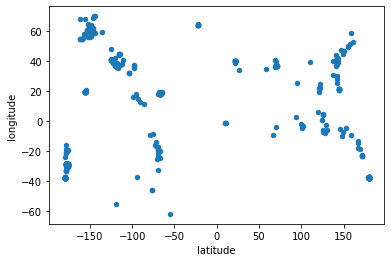

In [55]:
llp.plot(x='latitude', y='longitude', kind='scatter')

### For next time...

In the next class, you will try out another API that provides data you're interested in. You will be asked to try connecting to it using Python code, and performing some basic operations on the data.  To come prepared for next time, please explore some of the transportation-related APIs that may be valuable, and choose one that is of interest to you.

Here are a a few to get you started. 

Public Transit
https://www.programmableweb.com/news/how-smart-cities-are-using-apis-public-transport-apis/2014/05/22

Long-Distance Travel
http://www.olery.com/blog/the-best-travel-apis-discover-contribute/ 

Transportation
https://www.programmableweb.com/category/transportation/api


Start by reading the public transit page, because that provides a nice overview of the types of applications out there, and some of the issues in using them.  These lessons often apply to traffic and transportation more generally.  

Keep in mind that there are a number of different organizations that provide APIs, with different motivations and quality of what is provided.  If it is a private company, what is their business model?  What is the underlying source of the data, and what might that imply about how representative it is of the real world?  There is a ton of stuff out there.  How do we go about sorting out what is useful to us and what is now.  Spend some time exploring these and thinking about these questions.  
